In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

obj = pd.Series([4, 7, 5, 3])
obj

0    4
1    7
2    5
3    3
dtype: int64

In [3]:
obj.values

array([4, 7, 5, 3], dtype=int64)

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
(obj.median(), obj.mean(), obj.std(), obj.min(), obj.max())

(4.5, 4.75, 1.707825127659933, 3, 7)

In [6]:
obj.describe()

count    4.000000
mean     4.750000
std      1.707825
min      3.000000
25%      3.750000
50%      4.500000
75%      5.500000
max      7.000000
dtype: float64

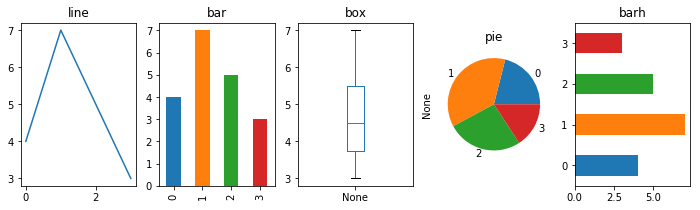

In [60]:
# pd.set_option('display.mpl_style', 'default')
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

obj.plot(ax=axes[0], kind='line', title='line')
obj.plot(ax=axes[1], kind='bar', title='bar')
obj.plot(ax=axes[2], kind='box', title='box')
obj.plot(ax=axes[3], kind='pie', title='pie')
obj.plot(ax=axes[4], kind='barh', title='barh')

In [15]:
list(obj.iteritems())

[(0, 4), (1, 7), (2, 5), (3, 3)]

In [18]:
pd.Series([2, 4, 3, 1], index=list('abcd'))

a    2
b    4
c    3
d    1
dtype: int64

In [20]:
sdata = {'a': 23, 'b': 98, 'c': 65, 'd': 12}
pd.Series(sdata)

a    23
b    98
c    65
d    12
dtype: int64

In [21]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [23]:
df = pd.DataFrame({
    "Population": [909976, 8615246, 2872086, 2273305],
    "State": ["Sweden", "United kingdom", "Italy", "France"]
},
                  index=["Stockholm", "London", "Rome", "Paris"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [24]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [25]:
type(df.Population)

pandas.core.series.Series

In [26]:
df.Population.Stockholm

909976

In [28]:
df.loc['Stockholm', :]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [34]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [37]:
file_path = "./data/land_data.xlsx"
df_pop = pd.read_excel(file_path, encoding='gbk')
df_pop.head().append(df.tail())

,agree_group,city_id,city_name,year,level,type,area,price,unit_price
0,衢州市,163,南昌市,2002,一级,商业用地,20.000000,1082.7900,54.14
1,衢州市,163,南昌市,2003,六级,工业用地,1.332200,123.8968,93.00
2,衢州市,163,南昌市,2003,六级,工业用地,2.666700,2530.1600,948.80
3,中山市,218,武汉市,2004,一级,商业用地,1.000200,2943.3900,2942.80
4,惠州市,127,合肥市,2005,一级,住房用地,0.909442,388.7865,427.50
51038,银川市,360,银川市,2018,未评估地区,其他用地,6.581881,1740.0000,264.36
51039,银川市,360,银川市,2018,未评估地区,其他用地,8.174193,2158.0000,264.00
51040,银川市,360,银川市,2018,未评估地区,其他用地,18.708932,10745.0000,574.32
51041,银川市人民政府,360,银川市,2018,未评估地区,商业用地,0.360000,588.0000,1633.33
51042,银川市人民政府,360,银川市,2018,未评估地区,商业用地,0.599290,5214.0000,8700.30


In [38]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51043 entries, 0 to 51042
Data columns (total 9 columns):
agree_group    46459 non-null object
city_id        51043 non-null int64
city_name      51043 non-null object
year           51043 non-null int64
level          50788 non-null object
type           51043 non-null object
area           51043 non-null float64
price          51043 non-null float64
unit_price     51043 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.5+ MB


In [39]:
# df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))
# 去掉逗号并转成数值型，并存到新列 NumericPopulation

In [40]:
# df_pop["State"] = df_pop["State"].apply(lambda x: x.strip()) # 同样去掉 State 中的空格

In [42]:
df_pop2 = df_pop.set_index(
    'city_name')  # 设置 city_name为 index，替换掉默认的 1 到 N-1 的index
df_pop2 = df_pop2.sort_index()  # 根据 city_name 来排序
df_pop2.head()

,agree_group,city_id,year,level,type,area,price,unit_price
city_name,,,,,,,,
三亚市,NaN,121,2014,三级,住房用地,1.322104,3781.0000,2859.84
三亚市,丽水市,121,2013,三级,工业用地,2.724477,1821.0000,668.39
三亚市,NaN,121,2013,三级,住房用地,3.192279,22156.0000,6940.50
三亚市,诸暨市人民政府,121,2013,三级,商业用地,3.537500,18700.0000,5286.22
三亚市,NaN,121,2013,三级,商业用地,4.158800,42419.7559,10200.00


In [44]:
df_pop3 = df_pop.set_index(['agree_group', 'city_name']).sort_index(level=0)
df_pop3.head()

city_id  year level  type       area       price  \
agree_group city_name                                                     
NaN         三亚市            121  2011    三级  其他用地  11.693377  25121.7481   
            三亚市            121  2011    三级  其他用地  18.027593  30540.5329   
            三亚市            121  2011    三级  其他用地  26.872600  60066.0000   
            三亚市            121  2011    三级  其他用地  26.872600  60066.0000   
            三亚市            121  2011    三级  其他用地  31.865600  71222.0000   

                       unit_price  
agree_group city_name              
NaN         三亚市           2148.37  
            三亚市           1694.10  
            三亚市           2235.21  
            三亚市           2235.21  
            三亚市           2235.07

In [53]:
df_pop3.loc['衢州市']

,city_id,year,level,type,area,price,unit_price
city_name,,,,,,,
上海市,289,2010,九级,住房用地,1.590900,4160.0000,2614.87
上海市,289,2010,七级,商业用地,1.621680,11.6761,7.20
上海市,289,2010,七级,工业用地,2.009210,960.0000,477.80
上海市,289,2010,九级,住房用地,2.499710,6530.0000,2612.30
上海市,289,2010,九级,商业用地,3.031590,15100.0000,4980.88
上海市,289,2010,七级,商业用地,3.094220,6312.2088,2040.00
上海市,289,2010,九级,住房用地,3.194150,7830.0000,2451.36
上海市,289,2010,七级,住房用地,3.864880,10188.7000,2636.23
上海市,289,2010,七级,住房用地,4.009970,8019.9400,2000.00


In [52]:
df_pop3.loc[('衢州市', '上海市')]

city_id  year level  type     area       price  \
agree_group city_name                                                   
衢州市         上海市            289  2010    九级  住房用地  1.59090   4160.0000   
            上海市            289  2010    七级  商业用地  1.62168     11.6761   
            上海市            289  2010    七级  工业用地  2.00921    960.0000   
            上海市            289  2010    九级  住房用地  2.49971   6530.0000   
            上海市            289  2010    九级  商业用地  3.03159  15100.0000   
            上海市            289  2010    七级  商业用地  3.09422   6312.2088   
            上海市            289  2010    九级  住房用地  3.19415   7830.0000   
            上海市            289  2010    七级  住房用地  3.86488  10188.7000   
            上海市            289  2010    七级  住房用地  4.00997   8019.9400   
            上海市            289  2010    七级  住房用地  4.23283   6479.6000   
            上海市            289  2010    九级  商业用地  4.23434   3819.3386   
            上海市            289  2010    九级  住房用地  4.86190  11920.0000   
            上海市            289  2010    九级  住房用地  5.29743  12980.0000   
            上海市            289  2010    九级  商业用地  5.34801  12033.0000   
            上海市            289  2010    七级  住房用地  5.44168   8250.4000   

                       unit_price  
agree_group city_name              
衢州市         上海市           2614.87  
            上海市              7.20  
            上海市            477.80  
            上海市           2612.30  
            上海市           4980.88  
            上海市           2040.00  
            上海市           2451.36  
            上海市           2636.23  
            上海市           2000.00  
            上海市           1530.80  
            上海市            901.99  
            上海市           2451.72  
            上海市           2450.24  
            上海市           2250.00  
            上海市           1516.15

In [55]:
df_pop3 = df_pop[['agree_group', 'city_name',
                  'area']].set_index(['agree_group', 'city_name'])
df_pop3.head()

area
agree_group city_name           
衢州市         南昌市        20.000000
            南昌市         1.332200
            南昌市         2.666700
中山市         武汉市         1.000200
惠州市         合肥市         0.909442

In [59]:
df_pop4 = df_pop3.sum(level='agree_group').sort_values('area', ascending=False)
df_pop4

,area
agree_group,
广州市,151328.772132
南宁市,110805.032891
肇庆市,11939.946242
惠州市,10274.927104
合肥市,6529.074262
中山市,6080.128257
东莞市,4626.777220
昆明市,4192.924564
武汉市,3869.458276


In [61]:
import datetime
pd.date_range('2019-1-1', periods=31)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range("2019-1-1 00:00", "2019-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [63]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2019-1-1", periods=31))
ts1.head() # index 是日期的被称为时间序列

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
Freq: D, dtype: int32

In [64]:
ts1["2019-1-3"]

2

In [65]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day # 可以取出对应的年月日

(2019, 1, 3)

In [66]:
type(ts1.index[2])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
ts1.index[2].to_pydatetime() # 可以转化成 datetime 基础的数据格式

datetime.datetime(2019, 1, 3, 0, 0)

In [68]:
periods = pd.PeriodIndex([pd.Period('2019-01'), pd.Period('2019-02'), pd.Period('2019-03')]) # 时间段，比如 2019-1 表示 2019年 1 月之内
ts3 = pd.Series(np.random.rand(3), periods)
ts3

2019-01    0.225588
2019-02    0.603520
2019-03    0.130212
Freq: M, dtype: float64

In [69]:
type(periods[1]) # 时间段

pandas._libs.tslibs.period.Period